In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

581

In [3]:
cities

['chuy',
 'mataura',
 'sakaiminato',
 'puerto ayora',
 'ahipara',
 'saskylakh',
 'vaini',
 'barentsburg',
 'cape town',
 'rikitea',
 'arraial do cabo',
 'clearwater',
 'vila franca do campo',
 'buloh kasap',
 'yellowknife',
 'shimoda',
 'jamestown',
 'punta arenas',
 'busselton',
 'neulengbach',
 'port alfred',
 'wangqing',
 'albany',
 'victoria',
 'kapaa',
 'fortuna',
 'atambua',
 'souillac',
 'bacuit',
 'taoudenni',
 'tasiilaq',
 'olafsvik',
 'turukhansk',
 'coihaique',
 'saint-philippe',
 'cabo san lucas',
 'leningradskiy',
 'bluff',
 'salalah',
 'port lincoln',
 'klyuchi',
 'cidreira',
 'storforshei',
 'qaanaaq',
 'tuatapere',
 'butaritari',
 'waddan',
 'ushuaia',
 'attawapiskat',
 'warqla',
 'mudanjiang',
 'gat',
 'faya',
 'esperance',
 'barrow',
 'tabiauea',
 'sao filipe',
 'upernavik',
 'atuona',
 'kyra',
 'sitges',
 'barahona',
 'bengkulu',
 'haines junction',
 'mahebourg',
 'sobolevo',
 'samarai',
 'hermanus',
 'cockburn town',
 'belushya guba',
 'provideniya',
 'bayshore gard

## Perform API Calls
1. Perform a weather check on each city using a series of successive API calls
2. Include a print log of each city as it's being processed (with the city number and city name)

In [12]:
# URL building blocks
base_url = 'http://api.openweathermap.org/data/2.5/weather'
params = {
    'q': '',
    'units': 'imperial',
    'appid': weather_api_key
}

# Blank lists to append to during the for loop
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
cities_found = []

print('Beginnig Data Retrieval')
print('---------------------------')

# For loop to go through each of the cities in the list
for city in cities:
    index = cities.index(city)
    # Updating 'q' in the parameters dictionary for each city in the list
    params['q'] = city
    
    # Obtaining the response for each city in json format using the base url and parameters
    response = requests.get(base_url, params=params).json()
    
    # Saving relevant information from the response (if applicable)
    try:
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        cities_found.append(response["name"])
        print(f'Processing Record {index} | {city}')
    except: 
        print('City not found. Skipping...')
        pass

print('---------------------------')
print('Data Retrieval Complete')
print('---------------------------')

Beginnig Data Retrieval
---------------------------
Processing Record 0 | chuy
Processing Record 1 | mataura
Processing Record 2 | sakaiminato
Processing Record 3 | puerto ayora
Processing Record 4 | ahipara
Processing Record 5 | saskylakh
Processing Record 6 | vaini
City not found. Skipping...
Processing Record 8 | cape town
Processing Record 9 | rikitea
Processing Record 10 | arraial do cabo
Processing Record 11 | clearwater
Processing Record 12 | vila franca do campo
Processing Record 13 | buloh kasap
Processing Record 14 | yellowknife
Processing Record 15 | shimoda
Processing Record 16 | jamestown
Processing Record 17 | punta arenas
Processing Record 18 | busselton
Processing Record 19 | neulengbach
Processing Record 20 | port alfred
Processing Record 21 | wangqing
Processing Record 22 | albany
Processing Record 23 | victoria
Processing Record 24 | kapaa
Processing Record 25 | fortuna
Processing Record 26 | atambua
Processing Record 27 | souillac
City not found. Skipping...
Process

Processing Record 251 | caravelas
Processing Record 252 | tiksi
Processing Record 253 | biak
Processing Record 254 | ligayan
Processing Record 255 | dossor
Processing Record 256 | kodiak
Processing Record 257 | tona
Processing Record 258 | lagoa
Processing Record 259 | male
City not found. Skipping...
Processing Record 261 | sabang
Processing Record 262 | polyarnyy
Processing Record 263 | rimbey
Processing Record 264 | chokurdakh
Processing Record 265 | fergus falls
Processing Record 266 | ust-omchug
Processing Record 267 | chekhov
Processing Record 268 | guerrero negro
City not found. Skipping...
Processing Record 270 | sars
Processing Record 271 | nome
Processing Record 272 | maumere
Processing Record 273 | catamarca
Processing Record 274 | bone
Processing Record 275 | osterburg
Processing Record 276 | labuhan
Processing Record 277 | ozernovskiy
Processing Record 278 | san juan
Processing Record 279 | porto nacional
Processing Record 280 | half moon bay
Processing Record 281 | buchan

Processing Record 503 | praia
Processing Record 504 | moranbah
Processing Record 505 | sorland
Processing Record 506 | birjand
Processing Record 507 | shipunovo
Processing Record 508 | marsh harbour
Processing Record 509 | kaeo
Processing Record 510 | stephenville
Processing Record 511 | iqaluit
Processing Record 512 | nipawin
Processing Record 513 | svetlaya
Processing Record 514 | bousso
Processing Record 515 | yumen
Processing Record 516 | bamiantong
Processing Record 517 | pauini
Processing Record 518 | pangnirtung
Processing Record 519 | saint-augustin
Processing Record 520 | bilibino
Processing Record 521 | longkou
Processing Record 522 | belmonte
Processing Record 523 | nouakchott
Processing Record 524 | huilong
Processing Record 525 | ajdabiya
Processing Record 526 | zaysan
Processing Record 527 | japura
Processing Record 528 | ust-tsilma
Processing Record 529 | nelson bay
Processing Record 530 | bismarck
Processing Record 531 | tsiroanomandidy
Processing Record 532 | sungaipen

## Convert Raw Data to DataFrame
Export the data into a .csv and display the DataFrame.

In [13]:
# Turning the lists of weather data into a DataFrame
weather_df = pd.DataFrame({'City': cities_found,
                           'Lat': lat,
                           'Lng': lng,
                           'Max Temp': max_temp,
                           'Humidity': humidity,
                           'Cloudiness': cloudiness,
                           'Wind Speed': wind_speed,
                           'Country': country,
                           'Date': date
})

# Exporting the DataFrame into a csv
weather_df.to_csv("Output/cities.csv")

In [14]:
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chui,-33.6971,-53.4616,52.79,71,0,7.83,UY,1650767853
1,Mataura,-46.1927,168.8643,52.48,90,97,8.99,NZ,1650767854
2,Sakaiminato,35.5500,133.2333,71.58,64,75,6.91,JP,1650767854
3,Puerto Ayora,-0.7393,-90.3518,71.92,91,70,5.97,EC,1650767854
4,Ahipara,-35.1667,173.1667,64.96,67,99,14.90,NZ,1650767855


# Inspect the data and remove the cities where humidity > 100%

In [17]:
# Finding all row indices where Humidity > 100
high_humidity = weather_df[weather_df['Humidity'].astype(int) > 100].index
high_humidity

# No cities have humidity > 100

Int64Index([], dtype='int64')

# Plotting the Data

In [39]:
# Creating a function to plot the data with less code
def scatterplot(y, x=weather_df['Lat']):
    # Building the scatter plot base
    plt.grid(True)
    
    # Determining appropriate y-axis values + adding a title and axis labels
    if y == 'Max Temp':
        y_axis = weather_df['Max Temp']
        plt.title('City Latitude vs. Max Temperature (4/23/22)')
        plt.xlabel('Latitude')
        plt.ylabel('Max Temperature (F)')
    elif y == 'Humidity':
        y_axis = weather_df['Humidity']
        plt.title('City Latitude vs. Humidity (4/23/22)')
        plt.xlabel('Latitude')
        plt.ylabel('Humidity (%)')
    elif y == 'Cloudiness':
        y_axis = weather_df['Cloudiness']
        plt.title('City Latitude vs. Cloudiness (4/23/22)')
        plt.xlabel('Latitude')
        plt.ylabel('Cloudiness (%)')
    elif y == 'Wind Speed':
        y_axis = weather_df['Wind Speed']
        plt.title('City Latitude vs. Wind Speed (4/23/22)')
        plt.xlabel('Latitude')
        plt.ylabel('Wind Speed (mph)')
    
    # Plotting the appropriate data
    plt.scatter(x, y_axis, marker='o')

## Latitude vs. Temperature Plot

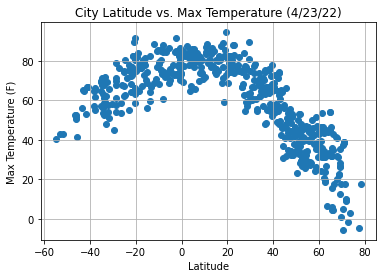

In [40]:
scatterplot('Max Temp')

# Saving the scatterplot as a png
plt.savefig("Output/LatitudeMaxTemperature.png")

'City Latitude vs. Max Temperature (4/23/22)' shows the maximum temperature, in Fahrenheit, for each city according to its latitude.

## Latitude vs. Humidity Plot

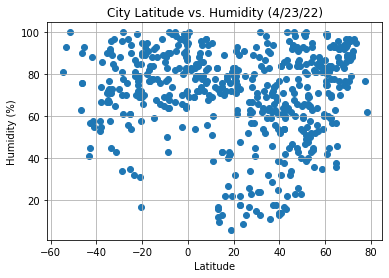

In [41]:
scatterplot('Humidity')

# Saving the scatterplot as a png
plt.savefig("Output/LatitudeHumidity.png")

'City Latitude vs. Humidity (4/23/22)' shows the humidity, as a percentage, for each city according to its latitude.

## Latitude vs. Cloudiness Plot

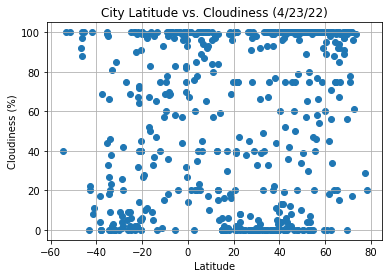

In [42]:
scatterplot('Cloudiness')

# Saving the scatterplot as a png
plt.savefig("Output/LatitudeCloudiness.png")

'City Latitude vs. Cloudiness (4/23/22)' shows the cloudiness, as a percentage, for each city according to its latitude.

## Latitude vs. Wind Speed Plot

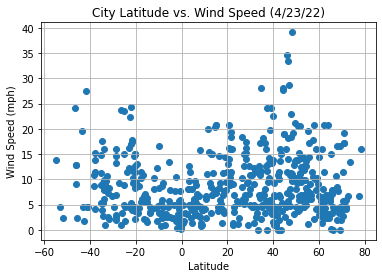

In [43]:
scatterplot('Wind Speed')

# Saving the scatterplot as a png
plt.savefig("Output/LatitudeWindSpeed.png")

'City Latitude vs. Wind Speed (4/23/22)' shows the wind speed, in miles per hour, for each city according to its latitude.

# Linear Regression

In [76]:
# Creating a function to plot the data with less code
def regression(x, y):
    # Determining latitude values based on 'Northern' or 'Southern' hemisphere input
    if x == 'Northern':
        new = weather_df.loc[weather_df['Lat'] >= 0]
        x_axis = new['Lat']
        # Annotation x coordinate
        x_annotate = 35
    elif x == 'Southern':
        new = weather_df.loc[weather_df['Lat'] < 0]
        x_axis = new['Lat']
        # Annotation x coordinate
        x_annotate =-35
    
    # Determining appropriate y-axis values + adding a title and axis labels
    if y == 'Max Temp':
        y_axis = new['Max Temp']
        plt.title(f'{x} Latitudes vs. Max Temperature (4/23/22)')
        plt.xlabel('Latitude')
        plt.ylabel('Max Temperature (F)')
        # Annotation y coordinate
        y_annotate = 90
    elif y == 'Humidity':
        y_axis = new['Humidity']
        plt.title(f'{x} Latitudes vs. Humidity (4/23/22)')
        plt.xlabel('Latitude')
        plt.ylabel('Humidity (%)')
        # Annotation y coordinate
        y_annotate = 30
    elif y == 'Cloudiness':
        y_axis = new['Cloudiness']
        plt.title(f'{x} Latitudes vs. Cloudiness (4/23/22)')
        plt.xlabel('Latitude')
        plt.ylabel('Cloudiness (%)')
        # Annotation y coordinate
        y_annotate = 80
    elif y == 'Wind Speed':
        y_axis = new['Wind Speed']
        plt.title(f'{x} Latitudes vs. Wind Speed (4/23/22)')
        plt.xlabel('Latitude')
        plt.ylabel('Wind Speed (mph)')
        # Annotation y coordinate
        y_annotate = 22

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    # Making regression line and annotation label
    regress_values = x_axis*slope + intercept
    line_eq = "y =" + str(round(slope,2)) + 'x +' + str(round(intercept,2))
    print(f'The r-value is: {rvalue**2}')
    
    # Plotting scatter plot and regression line (with annotation)
    plt.scatter(x_axis, y_axis, marker='o')
    plt.plot(x_axis, regress_values,'r-')
    plt.annotate(line_eq, (x_annotate, y_annotate), fontsize=15, color='r')

## Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7813603417298339


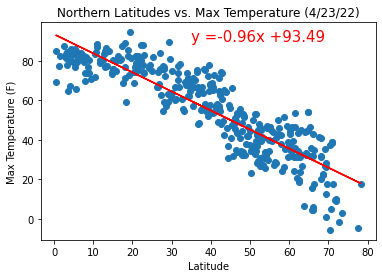

In [77]:
regression('Northern', 'Max Temp')

## Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.49576725792594256


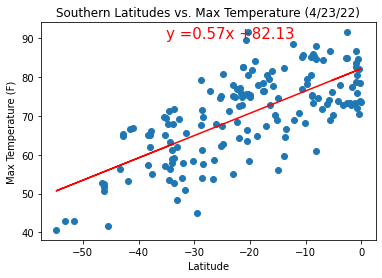

In [78]:
regression('Southern', 'Max Temp')

These two plots analyze the relationship between latitudes and maximum temperature, in Fahrenheit, using linear regression. According to the graphs, maximum temperature increases as the latitude approaches 0°. This relationship is more strongly correlated in the northern hemisphere, where the r-value is approximately 0.78 (as opposed to approximately 0.50 in the southern hemisphere). The stronger correlation is visually represented by a tighter adherence to the red regression line.

## Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.022124642407581434


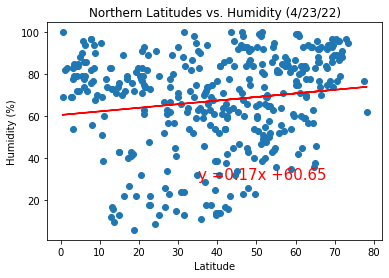

In [79]:
regression('Northern', 'Humidity')

## Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.04904598270417984


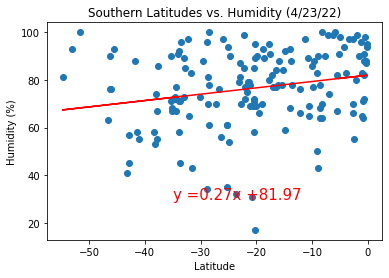

In [80]:
regression('Southern', 'Humidity')

These two plots analyze the relationship between latitudes and humidity, as a percentage, using linear regression. The wide spread of the scatter plots suggests a weak linear correlation between the metrics, if any. Both hemispheres have an r-value of less than 0.05, proving the very weak correlation. On average, the southern hemisphere appears to have a higher level of humidity.

## Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.052007791846237


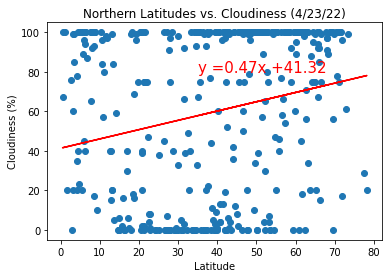

In [81]:
regression('Northern', 'Cloudiness')

## Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.09945880418028528


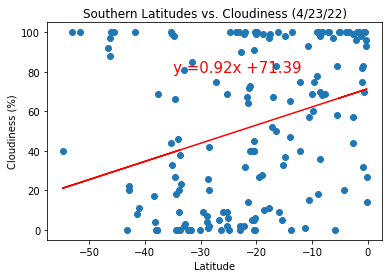

In [82]:
regression('Southern', 'Cloudiness')

These two plots analyze the relationship between latitudes and cloudiness, as a percentage, using linear regression. Each hemisphere displays a very weak linear correlation, with data points more congreagated at the extreme (near 0% and 100%) levels of humidity. Their r-values of less than 0.1 confirm the weak relationship.

## Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.001827256828211832


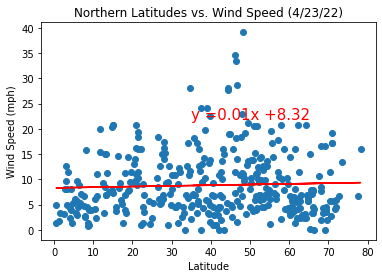

In [83]:
regression('Northern', 'Wind Speed')

## Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.1293410157963833


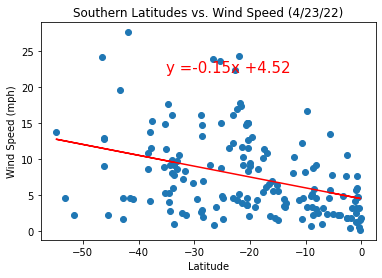

In [84]:
regression('Southern', 'Wind Speed')

These plots analyze the relationship between latitudes and wind speeds, in miles per hour, using linear regression. Although the southern hemisphere has a higher r-value (approximately 0.13) than the northern hemisphere (below 0.01), neither hemisphere is representative of even a moderate linear relationship. Based on the spread of data, the southern hemisphere also seems to have a larger standard deviation. 